In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


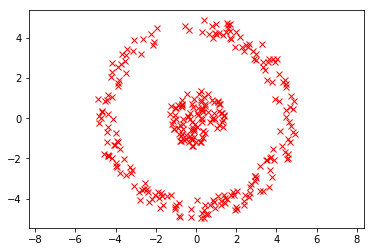

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class_0 = 100 #num obs from each class
class_1 = 200
x0 = np.hstack([np.random.uniform(0,2*np.pi,class_0).reshape(-1,1),np.random.uniform(0,2,class_0).reshape(-1,1) ])
x1 = np.hstack([np.random.uniform(0,2*np.pi,class_1).reshape(-1,1),np.random.uniform(4,5,class_1).reshape(-1,1) ])

x0 = np.hstack([np.multiply(np.sqrt(x0[:,1]),np.cos(x0[:,0])).reshape(-1,1) , np.multiply(np.sqrt(x0[:,1]),np.sin(x0[:,0])).reshape(-1,1) ])
x1 = np.hstack([np.multiply(x1[:,1],np.cos(x1[:,0])).reshape(-1,1) , np.multiply(x1[:,1],np.sin(x1[:,0])).reshape(-1,1) ])

plt.plot(x0[:,0],x0[:,1],'x',color='red')
plt.plot(x1[:,0],x1[:,1],'x',color='red')
#plt.figtext(0.5, 0.01, 'Figure 1: three Gaussian clouds of points. Red points represent class 0 green class 1 and blue class 2.', 
#            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

In [3]:
P =  np.vstack((x0,x1))

In [4]:
def d(x,y,l):
    return np.exp(-(1/(2*l**2))*(np.linalg.norm(x-y))**2)

In [5]:
total = P.shape[0]
l = 0.5

A = np.zeros([total,total])

In [6]:
for i in range(total):
    for j in range(total):
        if i == j:
            A[i,j] = 0
        else:
            A[i,j] = d(P[i,:],P[j,:],l)

In [7]:
D = np.zeros([total,total])
for i in range(total):
    for j in range(total):
        if i == j:
            D[i,j] = np.sum(A[i,:])

In [8]:
L = np.dot(np.dot(np.linalg.inv(np.sqrt(D)),A),np.linalg.inv(np.sqrt(D)))

In [9]:
eigenValues, eigenVectors = np.linalg.eig(L)

idx = eigenValues.argsort()[::-1]   
eigenvalues = eigenValues[idx]
eigenvectors = eigenVectors[:,idx]

In [10]:
X = eigenvectors[:,:2]

In [11]:
Y = np.zeros(X.shape)

In [12]:
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        Y[i,j] = X[i,j]/np.sqrt(np.sum(X[i,:]**2))

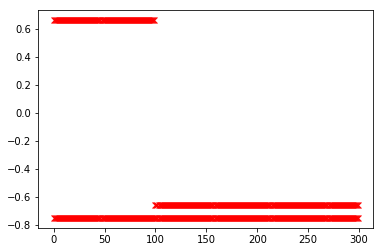

In [13]:
plt.plot(Y,'x',color='red')

In [14]:
from sklearn.cluster import KMeans


In [15]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)
labels = kmeans.labels_ 

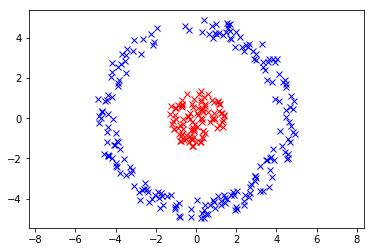

In [16]:
#Now we filter each of the clusters
clus1 = P[labels == 1]
clus0 = P[labels == 0]

#Now we plot the data
plt.plot(clus1[:,0],clus1[:,1],'ro',marker='x',color='red')
plt.plot(clus0[:,0],clus0[:,1],'ro',marker='x',color='blue')
plt.axis('equal')
plt.show()

In [17]:
import sklearn.datasets

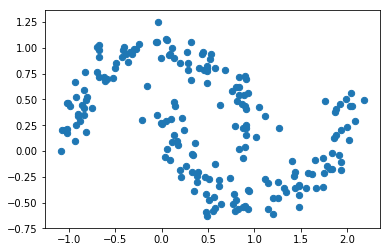

In [18]:
P, y = sklearn.datasets.make_moons(200, noise=0.11)
plt.scatter(P[:,0], P[:,1], s=40)